In [1]:
import os 
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt


from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision import transforms as T

import matplotlib.pyplot as plt

from PIL import Image

c:\Users\VINY\miniconda3\envs\vision\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_model_instance_segmentation(num_classes = 2):
    model = maskrcnn_resnet50_fpn(weights="MaskRCNN_ResNet50_FPN_Weights.COCO_V1").train()
    print("Total Number of parameters with backbone: {total}".format(total = sum([p.numel() for p in model.parameters() if p.requires_grad])))
    backbone_out_feautures = model.roi_heads.mask_predictor.conv5_mask.in_channels
    mask_predictor_hidden_dim = model.roi_heads.mask_predictor.conv5_mask.out_channels
    model.roi_heads.mask_predictor = MaskRCNNPredictor(
            backbone_out_feautures,
            mask_predictor_hidden_dim,
            num_classes
    )
    return model

In [19]:
def get_segmentation_mask(image, model, threshold=0.7):
    model.eval()
    with torch.no_grad():
        x = transform(image)  # Apply the transformation
        predictions = model([x, ])
        pred = predictions[0]
    # Extract masks
    masks = (pred["masks"] > threshold).squeeze(1)
    return masks.permute(1,2,0)[...,0].numpy()

def transform(img):
    img = torch.from_numpy(img / 255.0).float().permute(2,0,1)
    if img.shape[0] == 4:
        img = img[:3,...]
    return img

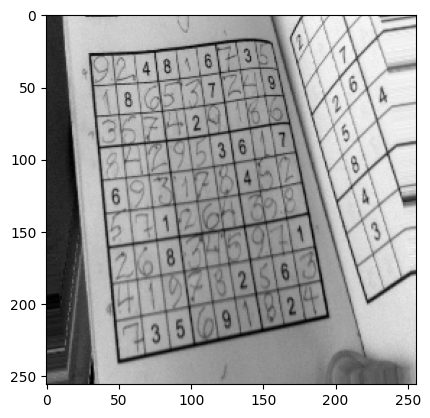

In [20]:
img  = cv2.imread('./data/original/images/1000_1739541260.1443574.jpg')
img = cv2.resize(img,(256,256))
plt.imshow(img)

In [21]:
model = get_model_instance_segmentation()
model.load_state_dict(torch.load('./model.pth')['model'])


Total Number of parameters with backbone: 44178993


<All keys matched successfully>

In [22]:
mask = get_segmentation_mask(img, model)

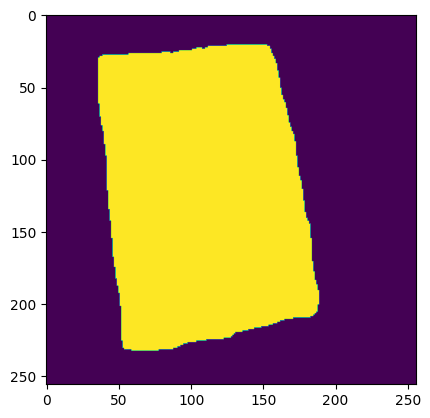

In [23]:
plt.imshow(mask)